In [231]:
import numpy as np

"""
Plots of airmass functions
give zenith angles in degrees
"""
R=6378160. # radius of earth in m
h= 8000.  #scale height of atmsophere in m
air=1.00031 #refractive index of air


    

In [232]:
def simple(za):
    # plane parallel atmosphere on flat earth
    zenr=np.radians(za)
    return 1./cos(zenr)

In [233]:
def spher(za):
    #spherical earth but uniform atmosphere
    z=np.radians(za)
    cosz=np.cos(z)
    r=R/h # to scale this all
    am=np.sqrt((r*cosz)**2 +2*r +1) -r*cosz
    return am

In [234]:
"""
According to WSRT the refractive index for radio is about 1.00031
refraction = airmass*(1-refracrtive index)

There is something wrong in this formula
"""
def F2(za):
    z=np.radians(za)
    f2=0 # default most of the time
    """
    if za >83 and za <86:
        f2=2.454 -20.794*cos(z)
    elif za >86:
        f2=0.175 +23.5*cos(z)
    return f2
    """    

def WSRT(za):
    z=np.radians(za)
    airmass= 1/cos(z) - F2(za)*( R*np.cos(z)**2 + 2*h/R - 1./(h*np.sqrt(R*np.cos(z)**2+2*h/R)-(R/h)*np.cos(z)))
    return airmass

In [235]:
"""
Kasten and Young formula
F. Kasten and A. T. Young, `Revised optical air mass tables and approximation formula',
Applied Optics 28(22), 4735{4738 (1989).

96.07995 degrees =  1.6769114726515257 radians
"""
def ky(za):
    z=np.radians(za)
    den=np.cos(z) + 0.50572*( 96.07995 - za)**(-1.6364)
    am=1.0/den
    return am

In [236]:
print ky(90.0)

37.9196083778

In [237]:
"""
Bemporad formula
"""
def bemporad(za):
    z=np.radians(za)
    sec=1.0/cos(z) # secant
    am= -0.0045 +1.00672*sec -0.002234*sec**2 - 0.0006247*sec**3
    return am
    

In [238]:
"""
Formula from Young 
A. T. Young, `Air mass and refraction', Applied Optics 33(6), 1108{1110 (1994).
using True zenith angle (NOT apparent)
"""
def young(za):
    z=np.radians(za)
    cosz=np.cos(z)
    am=(1.003198*cosz + 0.101632)/( cosz**2  + 0.090560*cosz + 0.003198)
    return am

In [245]:
"""
Ron Maddelena formula for GBT
http://www.gb.nrao.edu/~rmaddale/GBT/Calibration_Nov2012a.pdf
"""
def GBT(za):
    elev=90.-za # all in degrees
    am=-0.0234 +1.014/(np.sin(np.radians(elev+(5.18/(elev+3.35)))))
    return am
print GBT(89)

26.5020509264


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.

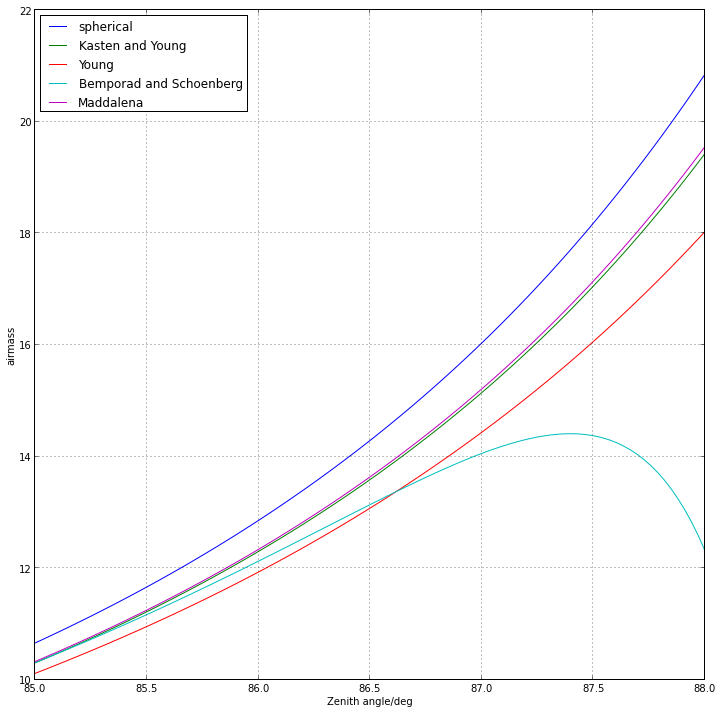

In [249]:
%pylab inline
za=np.linspace(85,88,100)
pylab.figure(1,figsize(12,12))
pylab.xlabel('Zenith angle/deg')
pylab.ylabel('airmass')
#pylab.plot(za,simple(za),label='simplistic')
pylab.plot(za,spher(za),label='spherical')
#pylab.plot(za, WSRT(za))
pylab.plot(za,ky(za),label='Kasten and Young')
pylab.plot(za,young(za),label='Young')
pylab.plot(za,bemporad(za),label='Bemporad and Schoenberg')
pylab.plot(za,GBT(za),label='Maddalena')
pylab.legend(loc='upper left')
pylab.grid()
pylab.show()



$\Delta E = C(n_0-1)f(E_{obs})  $

$\Delta E = C(n_0-1) g (E_{true})$

approimate values:
$n_0 -1 = 3 \times 10^{-4}$

In [240]:
"""


"""